<a href="https://colab.research.google.com/github/ShairaRubante/FTW/blob/main/Supervised_Learning_with_scikit_learn%201-3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning with scikit-learn**

**Machine Learning is the process whereby:**
*   Computers are given the ability to learn to make decisions from data
*   Without explicitly being programmed!
*   **Example:** Learning to preditct whether an email is spam or not spam knowing the content and sender
*   **Example:** Learning to cluster books into different categories based on the words they contain, then assigning any new book to one of the existing clusters 


**Unsupervised Learning**
*   Uncovering hidden patterns from unlabeled data
*   **Example** Grouping customers into distinct categories based on their purchasing behavior

**Supervised Learning**
*   The predicted value are known
*   **Aim:** Predict the target value of unseen data, given the features
*   **Example** Predicting the player's position using their points per game

**Types of Supervised Learning**
*   Classification
*   Regression


**Classification Supervised Learning**
*   Target variable consists of categories
*   **Example** Predict if the bank transaction is fraudulent or not. There are two categories, 'Fraudulent'and 'Not fraudulent.

**Regression Supervised Learning**
*   Target variable is continuous
*   **Example** Use number of bedrooms and size of the property to predict the price of the property.

**Naming conventions**
*   Feature = predictor variable = independent variable
*   Target variable = dependent variable = response variable

**Requirements before you do supervised learning**
*   No missing values
*   Data must be in numeric format
*   Data stored in pandas DataFrame or NumPy Arrat
*   **Remember** Perform EDA first to ensure data is in correct format




In [1]:
#Install scikit-learn in COlab
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#scikit-learn syntax
from sklearn.module import Model
model - Model()
mode.fit(X, y)
predictions = model.predict(X_new)
print(predictions)

## Binary classification
In the video, you saw that there are two types of supervised learning — classification and regression. Recall that binary classification is used to predict a target variable that has only two labels, typically represented numerically with a zero or a one.

A dataset, churn_df, has been preloaded for you in the console.

Your task is to examine the data and choose which column could be the target variable for binary classification.



**Possible Answers**
*   customer_service_calls
*   total_night_charge
*   **churn**
*   account_length



## The classification challenge

**Classifying labels of unseen data**
1.   Build a model
2.   Model learns from the labeled data we pass it
3.   Pass unlabeled data to the model as input
4.   Model predicts the labels of the unseen data

Labeled data = Training data

**k-Nearest Neighbors**
It predicts the label of a data point by
*   Looking at the k closest labeled data points
*   Taking a majority vote

If [k= 3](https://github.com/ShairaRubante/FTW/blob/main/k%20%3D3.png) we can classify the black dot as red

If [k= 5](https://github.com/ShairaRubante/FTW/blob/main/k%3D5.png) we can classify the black dot as blue

[**KNN Intuition**](https://github.com/ShairaRubante/FTW/blob/main/KNN%20Intuition.png)
*   All in grey are predicted to churn
*   All in red background are predicted to not churn





In [5]:
#import all necessary modules
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [6]:
#Upload dataset
url = "https://raw.githubusercontent.com/ShairaRubante/FTW/main/telecom_churn_clean.csv"
churn = pd.read_csv(url)
display(churn.head())

,Unnamed: 0,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


**Use scikit-learn to fit a classifier**

In [3]:
#Use scikit-learn to fit a classifier
x = churn[["total_day_charge","total_eve_charge"]].values
y=churn["churn"].values
print(x.shape,y.shape)
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(x,y)

NameError: ignored

**Predicting on Unlabled Data**

In [ ]:
x_new = np.array([[56.8,17.5],
                  [24.4,24.1],
                  [50.1,10.9]])
print(x_new.shape)
predictions = knn.predict(x_new)
print("Predictions:{}".format(predictions))

# Measuring Model Performance

**Accuracy**
*   Commonly used metric
*   Accuracy = correct predictions/ total observations
*   We could compute accuracy on the data used to fit the classifier
*   Performance NOT indicative of ability to generalize

**Computing Accuracy**


*   Split data to Training Set & Test Set
*   Fit/train classifier on training set
*   Calculate accuracy using Test Set



**Train/test split**



In [8]:
from sklearn.model_selection import train_test_split

X = churn.drop("churn", axis=1).values
y = churn["churn"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=21, stratify = y)
knn = KNeighborsClassifier(n_neighbors =6)
knn.fit(X_train, y_train)
print(knn.score(X_test,y_test))


0.86


**Model Complexity**
*  Larger k = less complex model = cause underfitting
*  Smaller k = more complex model = can lead to overfitting


**Model complexity and over/underfitting**


In [ ]:
neighbors = np.arange(1,26)
train_accuracies ={}
test_accuracies ={}

for neighbor in neighbors:
  knn = KNeighborsClassifier(n_neighbors=neighbor)
  knn.fit(X_train,y_train)
  train_accuracies[neighbor]= knn.score(X_train, y_train)
  test_accuracies[neighbor]= knn.score(X_test, y_test)


**Plotting our results**


In [ ]:
plt.figure(figsize =(8,6))
plt.title("KNN: Varying Number of Neighbors")
plt.plot(neighbors, train_accuracies.values(),label="Training Accuracy")
plt.plot(neighbors, test_accuracies.values(),label="Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

#Will show Mdel Complexity Curve

## **Exercise:** Train/test split + computing accuracy

Now that you have learned about the importance of splitting your data into training and test sets, it's time to practice doing this on the churn_df dataset!

NumPy arrays have been created for you containing the features as X and the target variable as y. You will split them into training and test sets, fit a KNN classifier to the training data, and then compute its accuracy on the test data using the .score() method.

Instructions
*  Import train_test_split from sklearn.model_selection.
*  Split X and y into training and test sets, setting test_size equal to 20%, random_state to 42, and ensuring the target label proportions reflect that of the original dataset.
*  Fit the knn model to the training data.
*  Compute and print the model's accuracy for the test data



In [ ]:
# Import the module
from sklearn.model_selection import train_test_split

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify = y)
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn = KNeighborsClassifier(n_neighbors =6)
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test,y_test))

## **Exercise:** Overfitting and underfitting


Interpreting model complexity is a great way to evaluate performance when utilizing supervised learning. Your aim is to produce a model that can interpret the relationship between features and the target variable, as well as generalize well when exposed to new observations.

You will generate accuracy scores for the training and test sets using a KNN classifier with different n_neighbor values, which you will plot in the next exercise.

The training and test sets have been created from the churn_df dataset and preloaded as X_train, X_test, y_train, and y_test.

In addition, KNeighborsClassifier has been imported for you along with numpy as np.

Instructions

* Create neighbors as a numpy array of values from 1 up to and including 12.
* Instantiate a KNN classifier, with the number of neighbors equal to the neighbor iterator.
* Fit the model to the training data.
* Calculate accuracy scores for the training set and test set separately using the .score() method, and assign the results to the index of the train_accuracies and test_accuracies dictionaries, respectively.

In [ ]:
# Create neighbors
neighbors = np.arange(1, 13)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
  
	# Set up a KNN Classifier
	knn = KNeighborsClassifier(n_neighbors=neighbor)
  
	# Fit the model
	knn.fit(X_train,y_train)
  
	# Compute accuracy
	train_accuracies[neighbor]= knn.score(X_train, y_train)
	test_accuracies[neighbor]= knn.score(X_test, y_test)
print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

## **Exercise:** Visualizing model complexity

Now you have calculated the accuracy of the KNN model on the training and test sets using various values of n_neighbors, you can create a model complexity curve to visualize how performance changes as the model becomes less complex!

The variables neighbors, train_accuracies, and test_accuracies, which you generated in the previous exercise, have all been preloaded for you. You will plot the results to aid in finding the optimal number of neighbors for your model.

Instructions

*  Add a title "KNN: Varying Number of Neighbors".
*  Plot the .values() method of train_accuracies on the y-axis against neighbors on the x-axis, with a label of "Training Accuracy".
*  Plot the .values() method of test_accuracies on the y-axis against neighbors on the x-axis, with a label of "Testing Accuracy".
*  Display the plot.

In [ ]:
# Add a title
plt.title("KNN: Varying Number of Neighbors")

# Plot training accuracies
plt.plot(neighbors, train_accuracies.values(),label="Training Accuracy")

# Plot test accuracies
plt.plot(neighbors, test_accuracies.values(),label="Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

# Display the plot
plt.show()

#**Introduction to regression**

Always has a continous value. We will use dataset for predicting blood glucose level.



**Predicting Blood Glucose Level**


In [ ]:
url = "https://raw.githubusercontent.com/ShairaRubante/FTW/main/diabetes_clean.csv"
diabetes_df = pd.read_csv(url)
display(diabetes_df.head())

**Creating features and target arrays**

In [ ]:
X = diabetes_df.drop("glucose", axis =1).values
y = diabetes_df["glucose"].values

#to confirm if both x and y are numpy arrays
print(type(x),type(y))

**Making predictions from a single feature**

In [ ]:
X_bmi = X[:,3]
print(y.shape,X_bmi.shape)



In [ ]:
#reshape
X_bmi = X_bmi.reshape(-1,1)
print(X_bmi.shape)


**Plotting glucose vs body mass index**

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X_bmi,y)
plt.ylabel("Blood Glucose (mg/dl)")
plt.xlabel("Body Mass Index")
plt.show()

**Fitting a regression model**

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_bmi, y)
predictions = reg.predict(X_bmi)
plt.scatter(X_bmi, y)
plt.plot(X_bmi, predictions)
plt.ylabel("Blood Glucose (mg/dl)")
plt.xlabel("Body Mass Index")
plt.show()


##**Exercise:** Creating features
In this chapter, you will work with a dataset called sales_df, which contains information on advertising campaign expenditure across different media types, and the number of dollars generated in sales for the respective campaign. The dataset has been preloaded for you. Here are the first two rows:

     tv        radio      social_media    sales
     13000.0   9237.76    2409.57         46677.90
     41000.0   15886.45   2913.41         150177.83


You will use the advertising expenditure as features to predict sales values, initially working with the "radio" column. However, before you make any predictions you will need to create the feature and target arrays, reshaping them to the correct format for scikit-learn.

Instructions
1.  Create X, an array of the values from the sales_df DataFrame's "radio" column.
2.  Create y, an array of the values from the sales_df DataFrame's "sales" column.
3.  Reshape X into a two-dimensional NumPy array.
4.  Print the shape of X and y.


In [ ]:
#import sales_df
url = "https://raw.githubusercontent.com/ShairaRubante/FTW/main/advertising_and_sales_clean.csv"
sales_df = pd.read_csv(url)
display(sales_df.head())

In [ ]:
import numpy as np

# Create X from the radio column's values
X = sales_df["radio"].values

# Create y from the sales column's values
y = sales_df["sales"].values

# Reshape X
X = X.reshape(-1, 1)

# Check the shape of the features and targets
print(X.shape, y.shape)

##**Exercise:** Building a linear regression model
Now you have created your feature and target arrays, you will train a linear regression model on all feature and target values.

As the goal is to assess the relationship between the feature and target values there is no need to split the data into training and test sets.

X and y have been preloaded for you as follows:

y = sales_df["sales"].values

X = sales_df["radio"].values.reshape(-1, 1)

Instructions
1.  Import LinearRegression.
2.  Instantiate a linear regression model.
3.  Predict sales values using X, storing as predictions.

In [ ]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X, y)


# Make predictions
predictions = reg.predict(X)

print(predictions[:5])

##**Exercise:** Visualizing a linear regression model
Now you have built your linear regression model and trained it using all available observations, you can visualize how well the model fits the data. This allows you to interpret the relationship between radio advertising expenditure and sales values.

The variables X, an array of radio values, y, an array of sales values, and predictions, an array of the model's predicted values for y given X, have all been preloaded for you from the previous exercise.

Instructions
1.  Import matplotlib.pyplot as plt.
2.  Create a scatter plot visualizing y against X, with observations in blue.
3.  Draw a red line plot displaying the predictions against X.
4.  Display the plot.

In [ ]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Create scatter plot
plt.scatter(X, y, color="b")

# Create line plot
plt.plot(X, predictions, color="r")
plt.xlabel("Radio Expenditure ($)")
plt.ylabel("Sales ($)")

# Display the plot
plt.show()


#The basics of linear regression

**Regession Mechanics**
*  y = ax + b
*  y = target
*  x = single feature
*  a,b = parameters/coefficient of the model - slope/intercept

**How do we choose a and b**
*  Define an error function for any given line
*  Choose a line that minimizes the error function
*  Error function = loss function = cost function

Residual -vertical distance between the datapoint and the line
Ordinary Least Square (OLS): Squaring the residual thus minimizing RSS

**Linear regression in high dimensions**
y = a1x1 + a2x2 + b

*To fit a linear regression model here:*
* Need to specify 3 variables, a1,a2,b

*In higher dimensions:* 
* Known as multiple regression
* Must specify coefficients for each feature and the variable b
* y = a1x1 + a2x2 + ... + anxn + b

*scikit-learn works exactly the same way:*
* Pass two arrays: features and target


**Linear regression using all features**


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model  import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.3, random_state =42)
reg_all = LinearRegression() 
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)

**R-squared**
* R^2: quantifies the variance in target values explained by the features
* Values ranges from 0 to 1
* High R^2 = data points close to the linear regression line, more fit
* High R^2 = data points are not close to the linear regression line


**R-squared in scikit-learn**

In [ ]:
reg_all.score(X_test,y_test)

**Mean squared error and root mean squared error**
* MSE is measured in target units, squared
* RMSE or square of MSE is in the same unit at the target variable

**RMSE in scikit-learn**

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared = False)

##**Exercise:**Fit and predict for regression

Now you have seen how linear regression works, your task is to create a multiple linear regression model using all of the features in the sales_df dataset, which has been preloaded for you. As a reminder, here are the first two rows:

         tv        radio      social_media    sales
    1    13000.0   9237.76    2409.57         46677.90
    2    41000.0   15886.45   2913.41         150177.83
You will then use this model to predict sales based on the values of the test features.

LinearRegression and train_test_split have been preloaded for you from their respective modules.

Instructions
1. Create X, an array containing values of all features in sales_df, and y, containing all values from the "sales" column.
2. Instantiate a linear regression model.
3. Fit the model to the training data.
4. Create y_pred, making predictions for sales using the test features.

In [ ]:
# Create X and y arrays
X = sales_df.drop("sales", axis=1).values
y = sales_df["sales"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the model
reg_all = LinearRegression() 

# Fit the model to the data
reg_all.fit(X_train, y_train)

# Make predictions
y_pred = reg_all.predict(X_test)
print("Predictions: {}, Actual Values: {}".format(y_pred[:2], y_test[:2]))

## **Exercise:** Regression performance
Now you have fit a model, reg, using all features from sales_df, and made predictions of sales values, you can evaluate performance using some common regression metrics.

The variables X_train, X_test, y_train, y_test, and y_pred, along with the fitted model, reg, all from the last exercise, have been preloaded for you.

Your task is to find out how well the features can explain the variance in the target values, along with assessing the model's ability to make predictions on unseen data.

Instructions
1. Import mean_squared_error.
2. Calculate the model's R-squared score by passing the test feature values and the test target values to an appropriate method.
3. Calculate the model's root mean squared error using y_test and y_pred.
4. Print r_squared and rmse.

In [ ]:
# Import mean_squared_error
from sklearn.metrics import mean_squared_error

# Compute R-squared
r_squared = reg.score(X_test,y_test)

# Compute RMSE
rmse =mean_squared_error(y_test, y_pred, squared = False)

# Print the metrics
print("R^2: {}".format(r_squared))
print("RMSE: {}".format(rmse))

#**Cross-validation**
**Cross-validation motivation**
* Model performance is dependent on the way we split up the data
* Not representative of the model's ability to generalize unseen data
* **Solution:** Cross-validation

**5-folds Cross Validation**
1. Splitting the dataset into 5 group/folds
2. We set the 1st fold as the test set
3. Fit our model on the remaining four folds, predict on our test set
4. Compute the metric of interest such as R-squared
5. We set aside 2nd fold as the test set and repeat 3 & 4
6. We set aside 3rd fold as the test set and repeat 3 & 4
7. We set aside 4th fold as the test set and repeat 3 & 4
8. We set aside 5th fold as the test set and repeat 3 & 4
9. Now, we have 5 values of R-squared from which we can compute statistics of interest such as mean, median, 95% confidence interval

Cross validation can be:
* 10-folds Cross Validation
* k-folds Cross Validation
* More folds = More computationally expensive



**Cross-validation in scikit-learn**

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
kf =KFold(n_splits =6, shuffle= True, random_state = 42)
reg = LinearRegression()
cv_results = cross_val_score(reg, X, y, cv=kf)


**Evaluating cross-validation performance**

In [ ]:
print(cv_results)
print(np.mean(cv_results),np.std(cv_results))
print(np.quantile(cv_results, [0.025,0.975]))



##**Exercise:** Cross-validation for R-squared

Cross-validation is a vital approach to evaluating a model. It maximizes the amount of data that is available to the model, as the model is not only trained but also tested on all of the available data.

In this exercise, you will build a linear regression model, then use 6-fold cross-validation to assess its accuracy for predicting sales using social media advertising expenditure. You will display the individual score for each of the six-folds.

The sales_df dataset has been split into y for the target variable, and X for the features, and preloaded for you. LinearRegression has been imported from sklearn.linear_model.

Instructions
1. Import KFold and cross_val_score.
2. Create kf by calling KFold(), setting the number of splits to six, shuffle to True, and setting a seed of 5.
3. Perform cross-validation using reg on X and y, passing kf to cv.
4. Print the cv_scores.

In [ ]:
# Import the necessary modules
from sklearn.model_selection import cross_val_score, KFold

# Create a KFold object
kf =KFold(n_splits =6, shuffle= True, random_state = 5)

reg = LinearRegression()

# Compute 6-fold cross-validation scores
cv_scores = cross_val_score(reg, X, y, cv=kf)

# Print scores
print(cv_scores)

##**Exercise:** Analyzing cross-validation metrics
Now you have performed cross-validation, it's time to analyze the results.

You will display the mean, standard deviation, and 95% confidence interval for cv_results, which has been preloaded for you from the previous exercise.

numpy has been imported for you as np.

Instructions
1. Calculate and print the mean of the results.
2. Calculate and print the standard deviation of cv_results.
3. Display the 95% confidence interval for your results using np.quantile().

In [ ]:
# Print the mean
print(np.mean(cv_results))

# Print the standard deviation
print(np.std(cv_results))

# Print the 95% confidence interval
print(np.quantile(cv_results, [0.025,0.975]))

#**Regularized regression**
**Why regularize?**
* Recall: Linear Regression minimizes a loss function
* It chooses a coefficient, a, for each feature variable, plus b
* Large coefficients can lead to overfitting
* Regularization: Penalize large coefficients

**Ridge regression**
* First type of regularization
* Ridges penalizes large positive/negative coefficients
* alpha: parameter we need to choose
* Picking alpha is similar to picking k in KNN
* Hyperparameter: variable used to optimize model parameters
* Alpha controls model complexity
* When alpha =0, can lead to overfitting
* Very high apha, can lead to underfitting






**Ridge regression in scikit-learn**

In [ ]:
from sklearn.linear_model import Ridge
score = []
for alpha in [0.1,1.0,10.0,100.0,1000.0]:
  ridge = Ridge(alpha=alpha)
  ridge.fit(X_train, y_train)
  y_pred = ridge.predict(X_test)
  scores.append(ridge.score(X_test, y_test))
print(scores)

**Lasso regression in scikit-learn**

In [ ]:
from sklearn.linear_model import Lasso
score = []
for alpha in [0.01,1.0,10.0,20.0,50.0]:
  lasso = Lasso(alpha=alpha)
  lasso.fit(X_train, y_train)
  lasso_pred = lasso.predict(X_test)
  scores.append(lasso.score(X_test, y_test))
print(scores)

**Lasso Regression for feature selection**
* Lasso can select important features of a dataset
* Shrinks the coefficients of less important features to zero
* Features not shrunk to zero are selected by lasso



**Lasso for feature selection in scikit-learn**


In [ ]:
from sklearn.linear_model import Lasso
x= diabetes_df.drop("glucose", axis=1).values
y= diabetes_df["glucose"].values
name= diabetes_df.drop("glucose", axis=1).columns
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_
plt.bar(names, lasso_coef)
plt.xticks(rotation=45)
plt.show()

##**Exercise:** Regularized regression: Ridge

Ridge regression performs regularization by computing the squared values of the model parameters multiplied by alpha and adding them to the loss function.

In this exercise, you will fit ridge regression models over a range of different alpha values, and print their R^2 scores. You will use all of the features in the sales_df dataset to predict "sales". The data has been split into X_train, X_test, y_train, y_test for you.

A variable called alphas has been provided as a list containing different alpha values, which you will loop through to generate scores.

Instructions
1. Import Ridge.
2. Instantiate Ridge, setting alpha equal to alpha.
3. Fit the model to the training data.
4. Calculate the  score for each iteration of ridge

In [ ]:
# Import Ridge
from sklearn.linear_model import Ridge
alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
ridge_scores = []
for alpha in alphas:
  
  # Create a Ridge regression model
  ridge = Ridge(alpha=alpha)
  
  # Fit the data
  ridge.fit(X_train, y_train)
  
  # Obtain R-squared
  score = ridge.score(X_test, y_test)
  ridge_scores.append(score)
print(ridge_scores)

##**Exercise:** Lasso regression for feature importance
In the video, you saw how lasso regression can be used to identify important features in a dataset.

In this exercise, you will fit a lasso regression model to the sales_df data and plot the model's coefficients.

The feature and target variable arrays have been pre-loaded as X and y, along with sales_columns, which contains the dataset's feature names.

Instructions

1. Import Lasso from sklearn.linear_model.
2. Instantiate a Lasso regressor with an alpha of 0.3.
3. Fit the model to the data.
4. Compute the model's coefficients, storing as lasso_coef.

In [ ]:
# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regression model
lasso = Lasso(alpha=0.3)

# Fit the model to the data
lasso.fit(X, y)

# Compute and print the coefficients
lasso_coef = lasso.fit(X, y).coef_
print(lasso_coef)
plt.bar(sales_columns, lasso_coef)
plt.xticks(rotation=45)
plt.show()

#**Fine-Tuning Your Model**

**Classification of metrics**

Measuring model performance with accuracy:
* Fractio of correctly classified samples
* Not always a useful metric

**Class imbalance**

Classification for predicting fraudulent bank transactions. 
* 99% are legitimate, 1% are fraudulent.

Could build a classifier that predicts NONE of the transactions are fraudulent
* 99% accurate
* But terrible at actually predicting fraudulent transactions
* Fails at its original purpose

Class imbalance: Uneven frequency of classes

Need a different way to assess performance

**Confusion matrix for asessing classification performance**

* **Prediction:** Fraudulent or Legitimate
* **Actual:** Fraudulent or Legitimate

---

* **True Positive:** P.Fraudulent & A.Fraudulent
* **False Positive:** P.Fraudulent & A.Legitimate
* **False Negative:** P.Legitimate & A.Fraudulent
* **True Negative:** P.Legitimate & A.Legitimate
---
* Accuracy = (True Prediction + False Prediction)/Total
* Precision = true positives/(true positives + false positives)

High Precision: lower false positive rate thus not many legitimate transactions are predicted to be fraudulent.
* Recall = true positives/ (true positives + false negative)

High Recall = lower false negative rate thus predicted most fraudulent transactions correctly. 

* F1 score = 2(precisions * recall)/(precision + recall)


**Confusion matrix in scikit-learn**

In [9]:
from sklearn.metrics import classification_report, confusion_matrix
knn = KNeighborsClassifier(n_neighbors =7)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(confusion_matrix(y_test,y_pred))

[[1133    5]
 [ 185   11]]


**Classification report in scikit-learn**

In [10]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1138
           1       0.69      0.06      0.10       196

    accuracy                           0.86      1334
   macro avg       0.77      0.53      0.51      1334
weighted avg       0.83      0.86      0.80      1334



##**Exercise:**Assessing a diabetes prediction classifier
In this chapter you'll work with the diabetes_df dataset introduced previously.

The goal is to predict whether or not each individual is likely to have diabetes based on the features body mass index (BMI) and age (in years). Therefore, it is a binary classification problem. A target value of 0 indicates that the individual does not have diabetes, while a value of 1 indicates that the individual does have diabetes.

diabetes_df has been preloaded for you as a pandas DataFrame and split into X_train, X_test, y_train, and y_test. In addition, a KNeighborsClassifier() has been instantiated and assigned to knn.

You will fit the model, make predictions on the test set, then produce a confusion matrix and classification report.

Instructions

1. Import confusion_matrix and classification_report.
2. Fit the model to the training data.
3. Predict the labels of the test set, storing the results as y_pred.
4. Compute and print the confusion matrix and classification report for the test labels versus the predicted labels.

In [11]:
# Import confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

knn = KNeighborsClassifier(n_neighbors=6)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1136    2]
 [ 191    5]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1138
           1       0.71      0.03      0.05       196

    accuracy                           0.86      1334
   macro avg       0.79      0.51      0.49      1334
weighted avg       0.84      0.86      0.79      1334



**Logistic regression and the ROC curve**

**Logistics Regression**
* Used for classification problems
* Outputs probabilities
* If the probability, p >=0.5 the data is labeled as 1
* If the probability, p < 0.5 the data is labeled as 0
* Produces a linear decision boundary


**Logistics regression in scikit-learn**


In [20]:
#Upload dataset
url = "https://raw.githubusercontent.com/ShairaRubante/FTW/main/telecom_churn_clean.csv"
churn = pd.read_csv(url)
display(churn.head())

,Unnamed: 0,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [21]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


**Predicting Probabilities**

In [22]:
y_pred_probs =logreg.predict_proba(X_test)[:,1]
print(y_pred_probs[0])


0.1595799285365924


**Probability Threshold**
* By default, logistic regression threshold = 0.5
* Not specific tologistic regression, KNN classifier also have threshholds
* What happpens if we vary thresholds?
* We use the ROC curve to visualize how different threshold affects false positive and true negative.
*  p=0 correctly predict positive value and incorrectly predict negative values
*  p= 1 both true and false is 0




**Plotting the ROC curve**

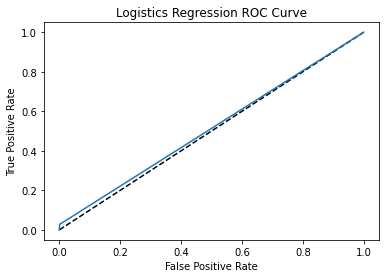

In [23]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistics Regression ROC Curve")
plt.show()


**ROC AUC in scikit-learn**

In [24]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred_probs))

0.7323889645943322


##**Exercise:** ROC AUC
The ROC curve you plotted in the last exercise looked promising.

Now you will compute the area under the ROC curve, along with the other classification metrics you have used previously.

The confusion_matrix and classification_report functions have been preloaded for you, along with the logreg model you previously built, plus X_train, X_test, y_train, y_test. Also, the model's predicted test set labels are stored as y_pred, and probabilities of test set observations belonging to the positive class stored as y_pred_probs.

A knn model has also been created and the performance metrics printed in the console, so you can compare the roc_auc_score, confusion_matrix, and classification_report between the two models.

Instructions
* Import roc_auc_score.
* Calculate and print the ROC AUC score, passing the test labels and the predicted positive class probabilities.
* Calculate and print the confusion matrix.
* Call classification_report().

In [25]:
# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Calculate roc_auc_score
print(roc_auc_score(y_test, y_pred_probs))

# Calculate the confusion matrix
print(confusion_matrix(y_test, y_pred))

# Calculate the classification report
print(classification_report(y_test, y_pred))

0.7323889645943322
[[856   1]
 [139   4]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       857
           1       0.80      0.03      0.05       143

    accuracy                           0.86      1000
   macro avg       0.83      0.51      0.49      1000
weighted avg       0.85      0.86      0.80      1000



#**Hyperparameter tuning**

**Hyperparameter tuning**
* Ridge/lasso regression: Choosing alpha
* KNN: Choosing neighbors
* Hyperparameters: Paramters we specify before fitting the models like alpha and n_neighbors

**Choosing the correct hyperparameter**
1. Try lots of different hyperparameter values
2. Fit all of them separately
3. See how well they perform
4. Choose the best performing values

* This is called hyperparameter tuning
* It is essential to use cross-validation to avoid overfitting to the test set
* We can still split the data and perform cross-validation on the training set
* We withhold the test set to final evaluation

**Grid search validation**
Use grid and choose which hyperparameter perform best




**GridSearchCV in scikit-learn**

In [ ]:
#Upload dataset
url = "https://raw.githubusercontent.com/ShairaRubante/FTW/main/telecom_churn_clean.csv"
churn = pd.read_csv(url)
display(churn.head())

In [32]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

kf = KFold(n_splits=5, shuffle=True, random_state=42)
param_grid ={"alpha":np.arange(0.0001,10),"solver":["sag","lsqr"]}
ridge =Ridge()
ridge_cv =GridSearchCV(ridge, param_grid, cv=kf)
ridge_cv.fit(X_train,y_train)
print(ridge_cv.best_params_,ridge_cv.best_score_)

{'alpha': 0.0001, 'solver': 'sag'} 0.09008824233417875


**Limitation and an alternative approach**
* 3-fold cross-validation, 1 hyperparameter, 10 total values = 30 fits
* 10-fold cross-validation, 3 hyperparameter, 30 total values = 900 fits

**RandomizedSearchCV**

In [36]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

kf = KFold(n_splits=5, shuffle=True, random_state=42)
param_grid ={"alpha":np.arange(0.0001,1,10),"solver":["sag","lsqr"]}
ridge =Ridge()
ridge_cv =RandomizedSearchCV(ridge, param_grid, cv=kf, n_iter=2)
ridge_cv.fit(X_train,y_train)
print(ridge_cv.best_params_,ridge_cv.best_score_)

{'solver': 'sag', 'alpha': 0.0001} 0.0900905793235575


**Evaluating on the test set**

In [37]:
test_score = ridge_cv.score(X_test, y_test)
print(test_score)

0.12199266932081398


**Hyperparameter tuning with RandomizedSearchCV**

As you saw, GridSearchCV can be computationally expensive, especially if you are searching over a large hyperparameter space. In this case, you can use RandomizedSearchCV, which tests a fixed number of hyperparameter settings from specified probability distributions.

Training and test sets from diabetes_df have been pre-loaded for you as X_train. X_test, y_train, and y_test, where the target is "diabetes". A logistic regression model has been created and stored as logreg, as well as a KFold variable stored as kf.

You will define a range of hyperparameters and use RandomizedSearchCV, which has been imported from sklearn.model_selection, to look for optimal hyperparameters from these options.

Instructions
* Create params, adding "l1" and "l2" as penalty values, setting C to a range of 50 float values between 0.1 and 1.0, and class_weight to either "balanced" or a dictionary containing 0:0.8, 1:0.2.
* Create the Randomized Search CV object, passing the model and the parameters, and setting cv equal to kf.
* Fit logreg_cv to the training data.
* Print the model's best parameters and accuracy score.

In [38]:
# Create the parameter space
params = {"penalty": ["l1", "l2"],
         "tol": np.linspace(0.0001, 1.0, 50),
         "C": np.linspace(0.1, 1.0, 50),
         "class_weight": ["balanced", {0:0.8, 1:0.2}]}

# Instantiate the RandomizedSearchCV object
logreg_cv = RandomizedSearchCV(logreg, params, cv=kf)

# Fit the data to the model
logreg_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Best Accuracy Score: {}".format(logreg_cv.best_score_))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Tuned Logistic Regression Parameters: {'tol': 0.4082224489795918, 'penalty': 'l2', 'class_weight': {0: 0.8, 1: 0.2}, 'C': 1.0}
Tuned Logistic Regression Best Accuracy Score: 0.8542573820661514


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
